# Система непересекающихся множеств

**Система непересекающихся множеств** (англ. **disjoint-set**, или **union–find data structure**) — структура данных, которая позволяет администрировать множество элементов, разбитое на непересекающиеся подмножества. При этом каждому подмножеству назначается его представитель — элемент этого подмножества. Абстрактная структура данных определяется множеством трёх операций: Union, Find, MakeSet

The general setting for the union-find problem is that we are maintaining a collection of disjoint
sets {$S_1$, $S_2$, . . . , $S_k$} over some universe, with the following operations:
- MakeSet(x): create the set {x}.
- Union(x, y): replace the set x is in (let’s call it S) and the set y is in (let’s call it S') with the single set S ∪ S'′
- Find(x): return the unique **ID** for the set containing x (this is just some representative element of this set).\

Для деревьев,  ID будет являтсья корень этого дерева.

Другими словами, union–find data structure объект ничего в себе не хранит. Он только указываем нодам (элементам) что и как им делать.

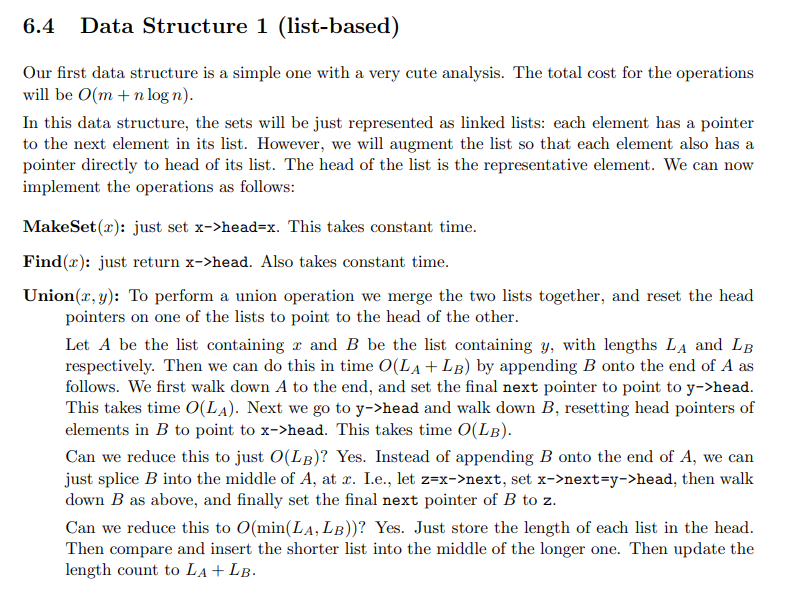

### Linked List and Union Find

In [43]:
class Node:
    def __init__(self, val):
        self.val = val
        self.head = None
        self.next = None 

# этот класс не используется
class Linked_List:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def add(self, node):
        if not isinstance(node, Node):
            node = Node(node)
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        node.head = self.head
        self.tail = node


        
class DISJOINT_SET():
    '''
    Использует Linked_list структуру данных. Каждая нода содержит в себе необходимые поля
    для работы
    '''
    def __init__(self):
        pass
    
    def make_set(self, x):
        '''
        Говорю вновь прешедшей ноде, что она есть царь ее множества (кроме нее никого нету)
        :param x: - Node object
        '''
        x.head = x
    
    def find(self, x):
        '''
        return the unique ID for the set containing x (this is just some 
        representative element of this set).
        
        Другими словами, возвращаю голову списка (root)
        :param x: - Node object
        '''
        return x.head
    
    def union(self, x, y):
        '''
        просто склеиваю два списка. В y списке каждому элементу переопределеяю head
        :param x: - Node object
        :param y: - Node object
        '''
        while isinstance(x.next, Node):
            x = x.next
        x.next = y.head
        
        while isinstance(y, Node):
            y.head = x.head
            y = y.next
        

x1 = Node(1)
x2 = Node(2)
x3 = Node(3)

dis_sets = DISJOINT_SET()
dis_sets.make_set(x1)
dis_sets.make_set(x2)
dis_sets.make_set(x3)

print("Распечатаю 'головы' всех множеств до объединения")
print(dis_sets.find(x1).val)
print(dis_sets.find(x2).val)
print(dis_sets.find(x3).val)

# объединяю множества x1 и x2
dis_sets.union(x1, x2)
print("Распечатаю 'головы' всех множеств после первого объединения")
print(dis_sets.find(x1).val)
print(dis_sets.find(x2).val)
print(dis_sets.find(x3).val)

# объединяю множества x1 и x3
dis_sets.union(x1, x3)
print("Распечатаю 'головы' всех множеств после второго объединения")
print(dis_sets.find(x1).val)
print(dis_sets.find(x2).val)
print(dis_sets.find(x3).val)

print("Множества объединены")



Распечатаю 'головы' всех множеств до объединения
1
2
3
Распечатаю 'головы' всех множеств после первого объединения
1
1
3
Распечатаю 'головы' всех множеств после второго объединения
1
1
1
Множества объединены


3

### Kruskal algorithm and Union_find linked_list

In [44]:
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
  
    def __init__(self,vertices): 
        self.V = vertices #No. of vertices 
        self.graph = []

    def add_edge(self,u,v,w): 
        self.graph.append([u,v,w]) 
        
  
    # The main function to construct MST using Kruskal's algorithm 
    def KruskalMST(self): 

        result = [] #This will store the resultant MST 

        nodes = [] # индексированный массив - каждый индекс указывает на ноду с тем же порядковым номером что и индекс 
        disjoint_set = DISJOINT_SET()
        for inode in range(self.V):  # размещаю все ноды в лист
            nodes.append(Node(inode))
            # каждую ноду превращаю в дерево с корнем inode
            disjoint_set.make_set(nodes[-1]) # ноду делаю множеством S_i. 
        
        # into nondecreasing order by weight
        self.graph =  sorted(self.graph, key=lambda item: item[2]) 
        print("graph")
        for kk in self.graph:
            print(kk)
            
        for u,v,w in self.graph: #taken in nondecreasing order by weight
            x = disjoint_set.find(nodes[u])
            y = disjoint_set.find(nodes[v])
            
            # если ноды не спарены (корни не совпадают)
            if x.val != y.val: 
                result.append([u,v,w]) 
                disjoint_set.union(x, y) # корени этих деревьев отныне совпадает            
  
        print ("Following are the edges in the constructed MST")
        for u,v,weight  in result: 
            print (f"{u} -- {v} == {weight}") 
            
# Driver code 
G = Graph(9) 
G.add_edge(0, 1, 4)
G.add_edge(0, 7, 8)
G.add_edge(1, 7, 11)
G.add_edge(1, 2, 8)
G.add_edge(7, 8, 8)
G.add_edge(7, 6, 1)
G.add_edge(8, 6, 6)
G.add_edge(8, 2, 2)
G.add_edge(6, 5, 2)
G.add_edge(2, 5, 4)
G.add_edge(2, 3, 7)
G.add_edge(3, 5, 14)
G.add_edge(5, 4, 10)
G.add_edge(3, 4, 9)

G.KruskalMST()

graph
[7, 6, 1]
[8, 2, 2]
[6, 5, 2]
[0, 1, 4]
[2, 5, 4]
[8, 6, 6]
[2, 3, 7]
[0, 7, 8]
[1, 2, 8]
[7, 8, 8]
[3, 4, 9]
[5, 4, 10]
[1, 7, 11]
[3, 5, 14]
Following are the edges in the constructed MST
7 -- 6 == 1
8 -- 2 == 2
6 -- 5 == 2
0 -- 1 == 4
2 -- 5 == 4
2 -- 3 == 7
0 -- 7 == 8
3 -- 4 == 9


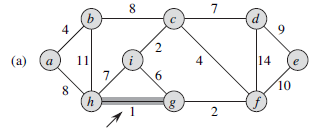